In [1]:
import numpy as np
# import time
# import pandas as pd
# from datetime import datetime
from matplotlib import pyplot as plt

Given a dataset of points in $\mathbb{R}^2$, $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ with $x_1<x_2<...<x_n$, our goal is to fit a straight line $l(x) = ax + b$ passing thru these points.
Ideally we would want the following equalities to yield:
$$y_1=ax_1+b+\varepsilon_1$$
$$y_2=ax_2+b+\varepsilon_2$$
$$\vdots$$
$$y_n=ax_1+b+\varepsilon_n,$$
for neglegible errors $\varepsilon_1,...\varepsilon_n\in\mathbb{R}$. So this can be translated into considering the function $\Phi\colon \mathbb{R}^2\to\mathbb{R}$ given by:
$$\Phi(a,b)=\sum_{i=1}^n\left[y_i-(ax_i+b)\right]^2,$$
which is the sum of the errors squared, and the objective is to find the arguments that minimize the value of the "total" error.
For that, we will consider the stationary points: $\nabla \Phi(a,b)= 0$.
$$\frac{\partial \Phi}{\partial a}(a,b)=0 \iff \sum_{i=1}^n2\left[y_i-(ax_i+b)\right](-x_i)=0.$$
Dividing both sides by $-2$:
$$\sum_{i=1}^n\left[x_iy_i-ax_i^2-bx_i\right]=0\iff a\sum_{i=1}^n x_i^2 + b\sum_{i=1}^n x_i = \sum_{i=1}^n x_iy_i.$$
For the $b$ component:
$$\frac{\partial \Phi}{\partial b}(a,b)=0 \iff \sum_{i=1}^n2\left[y_i-(ax_i+b)\right](-1)=0.$$
Dividing once more by $-2$ both sides, yields:
$$\sum_{i=1}^n[y_i-ax_i-b]=0\iff a\sum_{i=1}^n x_i + bn = \sum_{i=1}^n y_i.$$
Therefore:
$$\nabla\Phi(a,b)= 0\iff \begin{bmatrix}\sum_{i=1}^nx_i^2&\sum_{i=1}^nx_i\\[0.5em]\sum_{i=1}^nx_i&n\end{bmatrix}   \begin{bmatrix}a\\b\end{bmatrix}=\begin{bmatrix}\sum_{i=1}^nx_iy_i\\[0.5em]\sum_{i=1}^ny_i\end{bmatrix}.$$
So we arrived at a system of linear equations $AX=B$. To show that $\det A\ne 0$, it is sufficient to use the Cauchy-Schwarz inequality on $(x_1,...,x_n)$ and $(1,...,1)$ with underlying canonical inner product, that is, given $x = (x_1,...,x_n)$ and $y=(y_1,...,y_n)$, one has $$x\cdot y:= \sum_{i=1}^nx_iy_i.$$ Indeed, taking $y=(1,...,1)$ and applying the Cauchy-Schwarz inequality, it follows that $$\left|\sum_{i=1}^nx_i\cdot 1\right|^2\le \left(\sum_{i=1}^nx_i^2\right)\left(\sum_{i=1}^n1^2\right)\iff \underbrace{n\left(\sum_{i=1}^nx_i^2\right)-\left(\sum_{i=1}^nx_i\right)^2}_{\det A}\ge 0,$$
and the equality is attained when $(x_1,...,x_n)$ and $(1,...,1)$ are colinear, which would mean that with the provided data set one could draw a vertical line passing through all the points. Therefore $\det A\ne 0$.
Using Crammer's Rule, the unique solution is given by
$$a^*=\dfrac{\begin{vmatrix}\sum_{i=1}^nx_iy_i&\sum_{i=1}^nx_i\\[0.5em]\sum_{i=1}^ny_i&n\end{vmatrix}}{\det A},\quad b^* = \dfrac{\begin{vmatrix}\sum_{i=1}^nx_i^2&\sum_{i=1}^nx_iy_i\\[0.5em]\sum_{i=1}^nx_i&\sum_{i=1}^ny_i\end{vmatrix}}{\det A}$$

It is now left to show that the encountered point takes the minimum value of $\Phi$. This can be done by checking if the Hessian matrix of $\Phi$,
$$H_\Phi:=\begin{bmatrix}\frac{\partial^2 \Phi}{\partial x^2}&\frac{\partial^2 \Phi}{\partial x\partial y}\\[0.5em]\frac{\partial^2 \Phi}{\partial x\partial y}&\frac{\partial^2 \Phi}{\partial y^2}\end{bmatrix}$$
evaluated at the calculated stacionary point is (symmetric) positive-definite, that is, if one has:
$$\frac{\partial^2 \Phi}{\partial x^2}(a^*,b^*) > 0\quad\text{and}\quad \det H_\Phi(a^*,b^*)>0.$$
This method is left for the reader to try.

Other way to do is to use one-point compactification of the domain of $\Phi$ which is $\mathbb{R}^2$ and the codomain, which is $\mathbb{R}^+$. Since
$$\lim_{\left\|(a,b)\right\|_2\to +\infty}\Phi(a,b)=+\infty,$$
one can consider the following extension continuous extension $\overline{\Phi}\colon \mathbb{R}^2\cup\left\{\infty\right\}\to \left[0,+\infty\right]$, where $\overline{\Phi}|_{\mathbb{R}^2}=\Phi$ and $\overline{\Phi}(\infty)=+\infty$. Under these configurations, we see that the continuous function $\overline{\Phi}$ has compact domain, hence the image must be compact. That means that it must contain a minimum value, which cannot be $+\infty$. Since we encountered only one stacionary point, we know for sure that it attains the (global) minimum value.

Now we are ready to apply this into code.

In [3]:
np.random.seed(2)
n = 50 # dimension of the dataset
x = np.linspace(1, 10, n) # arbitrary x components
vec_1 = np.array([1 for i in range(n)])
mu = 0
sigma = 2
l = 2 * x + 1 # some auxiliar line to generate arbitrary y values
epsilon = np.random.normal(mu, sigma, n)
y = l + epsilon # arbitrary y components

In [4]:
y_lower = l - sigma # lower bound of a region
y_upper = l + sigma # upper bound of a region

Notice that if $X\sim N(\mu,\sigma)$ then $P(\left|X-\mu\right|<\sigma)\simeq 68.2\%$. So we expect $31.8\%$ of the points to be out of the bounded region.

In [5]:
# let's write the components for the matrix A
A11 = np.inner(x, x)
A12 = np.inner(x, vec_1)
A21 = A12
A22 = n
# let's write the components for the matrix B
B1 = np.inner(x, y)
B2 = np.inner(y, vec_1)
# now let us calculate the coefficients of the straight line
detA = A11 * A22 - A21 * A12
a = (B1 * A22 - B2 * A12) / detA
b = (A11 * B2 - A21 * B1) / detA
# so the best fitting straight line is as follows
l = a * x + b

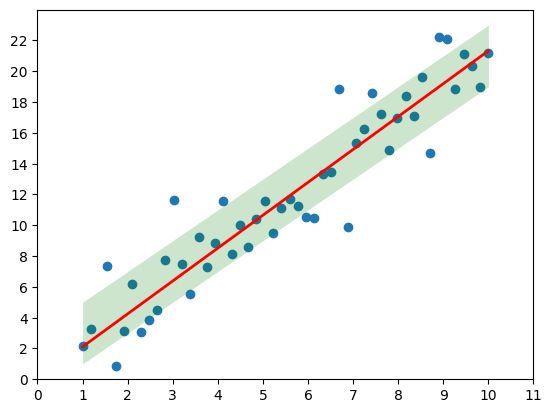

In [6]:
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.set(xlim=(0, 11), xticks=np.arange(0, 12, 1),
       ylim=(0, 24), yticks=np.arange(0, 23, 2))

ax.fill_between(x, y_lower, y_upper, alpha=0.2, linewidth=0, color='g')

ax.plot(x, l, linewidth=2.0, color='r')

# plt.savefig('figura.pdf')
plt.show()